In the previous chapter, we've analysed a single sequence (describing the genome of e. coli) in a lot of detail. In this chapter, we turn towards comparing the genomic sequences of _multiple_ organisms with one another.

We will compare the genome from a number of fungi. Included with this repo you'll find genomic sequences for a number of common fungi with beneficial roles in society (wine, beer, and cheese making) and a few that are not so beneficial. Can we understand how these organisms are related simply by looking at their genome?

Note: the fungal sequences in our repo do not cover the whole genome for each fungus, but only the so-called ITS region. This is a relatively short region (a few 100 basepairs at most) that nevertheless has enough information to take an educated guess about the fungal taxonomy.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

## Loading the data

The `data/` folder has a fairly recent checkout (July 2018) of the [NCBI RefSeq ITS project](https://www.ncbi.nlm.nih.gov/nuccore?term=PRJNA177353). The sequences in this database describe the ITS region for a number of fungal species. As the database is only a few megabytes in size, let's start by loading all of these sequences into memory.

In [2]:
refseq_its = "data/fungi.ITS.fna"

from Bio import SeqIO

In [3]:
seqs = list(SeqIO.parse(refseq_its, "fasta"))

In [4]:
len(seqs)

8906

In [5]:
seqs[0]

SeqRecord(seq=Seq('GAACCTGCGGAAGGATCATTATTAAGACAGGGCCTGTTAGGCCCGACCTCCAAC...GAA', SingleLetterAlphabet()), id='NR_132798.1', name='NR_132798.1', description='NR_132798.1 Roccella elisabethae S L14846 ITS region; from TYPE material', dbxrefs=[])

The`SeqRecord` instances that we have loaded have the scientific name as part of the `description` field, which looks something like 
```
    NR_132798.1 Roccella elisabethae S L14846 ITS region; from TYPE material
```
In this case, the scientific name is _Rocella elisabethae_. Let's extract the scientific name and store it in the `.annotations` attribute on each sequence record.

Let's start by writing a function to extract the scientific name.

In [6]:
def name_from_description(desc):
    seq_id, genus, species = desc.split()[:3]
    taxonomy = {
        'genus': genus,
        'species': species,
        'name': '{} {}'.format(genus, species)
    }
    return seq_id, taxonomy

desc0 = "NR_132798.1 Roccella elisabethae S L14846 ITS region; from TYPE material"
assert name_from_description(desc0) == ("NR_132798.1", {
    'name': "Roccella elisabethae",
    'genus': "Roccella",
    'species': "elisabethae"
})


Now let's loop over the sequences to store the taxonomy in the `.annotations` metadata attribute. For each sequence this is a dictionary in which we can store arbitrary metadata. Let's store for each sequence the genus, species and full name as "genus", "species" and "name". 

1. Store `name`, `genus`, `species` in the `.annotations` dictionary.
1. Fix up the `.description` attribute so that it refers only to the sequence ID.

Note: this operation changes the `seqs` list in-place.

In [7]:
for seq in seqs:
    seq_id, taxonomy = name_from_description(seq.description)
    seq.annotations.update(taxonomy)
    seq.description = seq_id

assert seqs[0].description == 'NR_132798.1'
assert seqs[0].annotations['name'] == "Roccella elisabethae"
assert seqs[0].annotations['genus'] == "Roccella"
assert seqs[0].annotations['species'] == "elisabethae"

In [8]:
seqs[0]

SeqRecord(seq=Seq('GAACCTGCGGAAGGATCATTATTAAGACAGGGCCTGTTAGGCCCGACCTCCAAC...GAA', SingleLetterAlphabet()), id='NR_132798.1', name='NR_132798.1', description='NR_132798.1', dbxrefs=[])

How many different genera are there? How are the different sequences in our database distributed among the genera?

In [9]:
from collections import Counter

count_genera = Counter(seq.annotations['genus'] for seq in seqs)
print(len(count_genera))
print(count_genera.most_common(10))

1987
[('Cortinarius', 422), ('Penicillium', 350), ('Aspergillus', 330), ('Trichoderma', 228), ('Colletotrichum', 160), ('[Candida]', 157), ('Inocybe', 146), ('Diaporthe', 127), ('Alternaria', 127), ('Talaromyces', 90)]


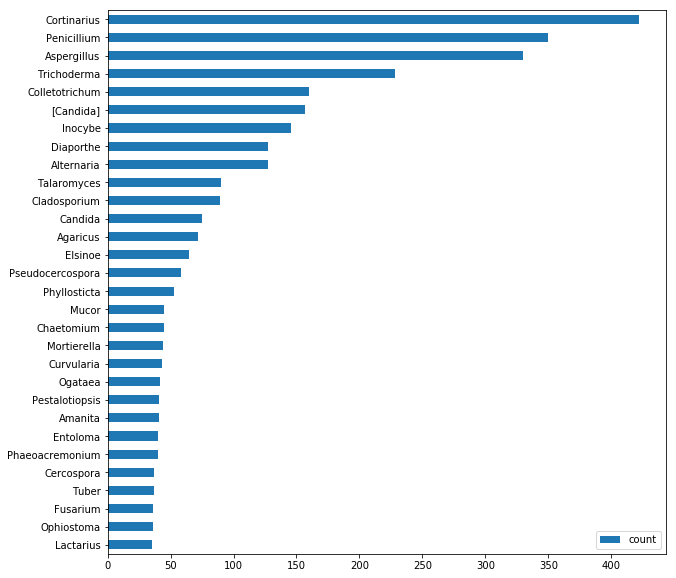

In [10]:
%matplotlib inline

import pandas as pd

most_common = count_genera.most_common(30)
names, values = zip(*reversed(most_common))

count_genera_df = pd.DataFrame(index=names, data={'count': list(values)})
count_genera_df.plot.barh(figsize=(10, 10))

del count_genera_df  # This dataframe was just to make plotting easier

Out of these 8000-odd sequences, let's take a small subset to analyze further. 

We will focus on some selected samples from [Aspergillus](https://en.wikipedia.org/wiki/Aspergillus), [Penicillium](https://en.wikipedia.org/wiki/Penicillium) and [Saccharomyces](https://en.wikipedia.org/wiki/Saccharomyces).

expand this. mention toxicity, highlight "national fungus" status for A. oryzae, talk about role of yeast in beer, penicillin.

Write a for-loop that selects the sequence records whose `name` metadata entry matches exactly one of the entries in the list below.

In [11]:
names_of_interest = [
    "Aspergillus sojae",          # soy sauce
    "Aspergillus oryzae",         # koji (sake, makgeolli, shochu, ...)
    "Aspergillus niger",          # citric acid
    "Aspergillus nidulans",       # industrial uses
    "Aspergillus fumigatus",      # toxic
    "Aspergillus flavus",         # toxic
    "Penicillium chrysogenum",    # makes penicillin
    "Penicillium italicum",       # plant pathogen
    "Penicillium roqueforti",     # cheese making
    "Penicillium verrucosum",     # toxic
    "Saccharomyces cerevisiae",   # beer
    "Saccharomyces eubayanus",    # beer
    "Saccharomyces pastorianus",  # beer
    "Saccharomyces paradoxus",    # wild yeast
]

selected = []
for seq in seqs:
    if seq.annotations['name'] in names_of_interest:
        selected.append(seq)
        
assert len(selected) == len(names_of_interest)

In [12]:
ids_to_names = {seq.id: seq.annotations['name'] for seq in selected}
ids_to_names

{'NR_077145.1': 'Penicillium chrysogenum',
 'NR_103621.1': 'Penicillium roqueforti',
 'NR_111007.1': 'Saccharomyces cerevisiae',
 'NR_111041.1': 'Aspergillus flavus',
 'NR_111348.1': 'Aspergillus niger',
 'NR_111545.1': 'Aspergillus sojae',
 'NR_119495.1': 'Penicillium verrucosum',
 'NR_121481.1': 'Aspergillus fumigatus',
 'NR_133684.1': 'Aspergillus nidulans',
 'NR_135395.1': 'Aspergillus oryzae',
 'NR_137586.1': 'Saccharomyces eubayanus',
 'NR_138272.1': 'Saccharomyces paradoxus',
 'NR_138273.1': 'Saccharomyces pastorianus',
 'NR_153215.1': 'Penicillium italicum'}

## Multiple alignment

In [13]:
with open("selected_fungi.fasta", "w") as fp:
    SeqIO.write(selected, fp, "fasta")

In [14]:
!head selected_fungi.fasta

>NR_121481.1
AACGACTCCCCAGAGCCGGAAAGTTGGTCAAACCCGGTCATTTAGAGGAAGTAAAAGTCG
TAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTACCGAGTGAGGGCCCTCTGGG
TCCAACCTCCCACCCGTGTCTATCGTACCTTGTTGCTTCGGCGGGCCCGCCGTTTCGACG
GCCGCCGGGGAGGCCTTGCGCCCCCGGGCCCGCGCCCGCCGAAGACCCCAACATGAACGC
TGTTCTGAAAGTATGCAGTCTGAGTTGATTATCGTAATCAGTTAAAACTTTCAACAACGG
ATCTCTTGGTTCCGGCATCGATGAAGAACGCAGCGAAATGCGATAAGTAATGTGAATTGC
AGAATTCAGTGAATCATCGAGTCTTTGAACGCACATTGCGCCCCCTGGTATTCCGGGGGG
CATGCCTGTCCGAGCGTCATTGCTGCCCTCAAGCACGGCTTGTGTGTTGGGCCCCCGTCC
CCCTCTCCCGGGGGACGGGCCCGAAAGGCAGCGGCGGCACCGCGTCCGGTCCTCGAGCGT


In [15]:
from Bio.Align.Applications import MafftCommandline

mafft_cmd = MafftCommandline(input="selected_fungi.fasta")
stdout, stderr = mafft_cmd()

In [16]:
with open("selected_aligned.fasta", "w") as fp:
    fp.write(stdout)

In [17]:
# print(stderr)

In [18]:
print(stdout)

>NR_121481.1
aacgactccccagagccggaaagttggtcaaacccggtcatttagaggaagtaaaagtcg
taacaaggtttccgtaggtgaacct----------------gcggaaggatcattaccga
gtgagg-----------------gccctctgggtccaacctcccacccgtgtcta-----
-----------tcgtacctt-gttgcttcggcgggc------------------------
-------------ccgccgtttcgacggccgccggggag--g------------------
-ccttgcgcc-cccgggcccgcgcccgccgaagaccccaa--------------------
-catgaacgctgt-tctgaaagta-tgcagtctgagttgatt---atcgtaatcagttaa
aactttcaacaacggatctcttggttccggcatcgatgaagaacgcagcgaaatgcgata
agtaatgtgaattgcagaattcagtgaatcatcgagtctttgaacgcacattgcgccccc
tggtattccggggggcatgcctgtccgagcgtcattgctgccc-tcaagc----------
-------------------------------------acggcttgtgtgttgggcccccg
tccccctctcccggggg---------acgggcccgaaaggcagcggcggcaccgcgtccg
gtcctcgagcgtatggggctttgtcacctgc-----------tctgt---aggcccggcc
ggcgccagccgaca----------------cccaactttatttttctaaggttgacctcg
gatcaggtagggatacccgctgaacttaagcatatcaataagcggaggaaaagaaaccaa
cagggattgcctcagtaacggcgagtgaa-
>NR_119495.1
----------------------------

In [19]:
from io import StringIO
from Bio import AlignIO

align = AlignIO.read(StringIO(stdout), "fasta")

In [20]:
print(align.format("phylip"))

 14 930
NR_121481. aacgactccc cagagccgga aagttggtca aacccggtca tttagaggaa
NR_119495. ---------- ---------- ---------- ---------- ----------
NR_111545. ---------- ---------- ---------- ---------- ----------
NR_111041. ---------- ---------- ---------- ---------- ----------
NR_111007. ---------- ---------- ---------- ---------- ----------
NR_103621. ---------- ---------- ---------- ---------- ----------
NR_077145. ---------- ---------- ---------- ---------- ----------
NR_133684. ---------- ---------- ---------- ---------- ----------
NR_111348. ---------- ---------- ---------- ---------- ----------
NR_153215. ---------- ---------- ---------- ---------- ----------
NR_138273. ---------- ---------- ---------- ---------- ----------
NR_138272. ---------- ---------- ---------- ---------- ----------
NR_137586. ---------- ---------- ---------- ---------- ----------
NR_135395. ---------- ---------- ---------- ---------- ----------

           gtaaaagtcg taacaaggtt tccgtaggtg aacct----- ----------
 

If you are running this notebook in JupyterLab and have the [Fasta viewer](https://github.com/jupyterlab/jupyter-renderers/tree/master/packages/fasta-extension) installed you can also view a graphical representation of this alignment.

In [21]:
from IPython.display import display

def Fasta(data=''):
    bundle = {}
    bundle['application/vnd.fasta.fasta'] = data
    bundle['text/plain'] = data
    display(bundle, raw=True)

Fasta(stdout)

>NR_121481.1
aacgactccccagagccggaaagttggtcaaacccggtcatttagaggaagtaaaagtcg
taacaaggtttccgtaggtgaacct----------------gcggaaggatcattaccga
gtgagg-----------------gccctctgggtccaacctcccacccgtgtcta-----
-----------tcgtacctt-gttgcttcggcgggc------------------------
-------------ccgccgtttcgacggccgccggggag--g------------------
-ccttgcgcc-cccgggcccgcgcccgccgaagaccccaa--------------------
-catgaacgctgt-tctgaaagta-tgcagtctgagttgatt---atcgtaatcagttaa
aactttcaacaacggatctcttggttccggcatcgatgaagaacgcagcgaaatgcgata
agtaatgtgaattgcagaattcagtgaatcatcgagtctttgaacgcacattgcgccccc
tggtattccggggggcatgcctgtccgagcgtcattgctgccc-tcaagc----------
-------------------------------------acggcttgtgtgttgggcccccg
tccccctctcccggggg---------acgggcccgaaaggcagcggcggcaccgcgtccg
gtcctcgagcgtatggggctttgtcacctgc-----------tctgt---aggcccggcc
ggcgccagccgaca----------------cccaactttatttttctaaggttgacctcg
gatcaggtagggatacccgctgaacttaagcatatcaataagcggaggaaaagaaaccaa
cagggattgcctcagtaacggcgagtgaa-
>NR_119495.1
----------------------------

In [22]:
ids_to_names

{'NR_077145.1': 'Penicillium chrysogenum',
 'NR_103621.1': 'Penicillium roqueforti',
 'NR_111007.1': 'Saccharomyces cerevisiae',
 'NR_111041.1': 'Aspergillus flavus',
 'NR_111348.1': 'Aspergillus niger',
 'NR_111545.1': 'Aspergillus sojae',
 'NR_119495.1': 'Penicillium verrucosum',
 'NR_121481.1': 'Aspergillus fumigatus',
 'NR_133684.1': 'Aspergillus nidulans',
 'NR_135395.1': 'Aspergillus oryzae',
 'NR_137586.1': 'Saccharomyces eubayanus',
 'NR_138272.1': 'Saccharomyces paradoxus',
 'NR_138273.1': 'Saccharomyces pastorianus',
 'NR_153215.1': 'Penicillium italicum'}

## Building a phylogenetic tree

In [23]:
from Bio.Phylo.Applications import FastTreeCommandline

In [24]:
fasttree = FastTreeCommandline(
    input="selected_aligned.fasta", out="selected.newick", nt=True
)

In [25]:
stdout, stderr = fasttree()

In [26]:
!cat selected.newick

(((NR_138273.1:0.00055,NR_137586.1:0.00136)0.971:0.01790,(NR_111007.1:0.00393,NR_138272.1:0.00520)0.083:0.00053)1.000:0.53925,(NR_077145.1:0.00053,(NR_103621.1:0.02059,(NR_119495.1:0.00500,NR_153215.1:0.00960)0.749:0.00158)0.405:0.00320)0.740:0.01927,((NR_111348.1:0.05055,(NR_121481.1:0.02034,NR_133684.1:0.10534)0.283:0.01027)0.132:0.01688,(NR_111545.1:0.00606,(NR_111041.1:0.00168,NR_135395.1:0.00159)0.824:0.00478)1.000:0.05974)0.876:0.02858);


## Visualizing the phylogenetic tree

In [27]:
from Bio import Phylo

tree = Phylo.read("selected.newick", "newick")

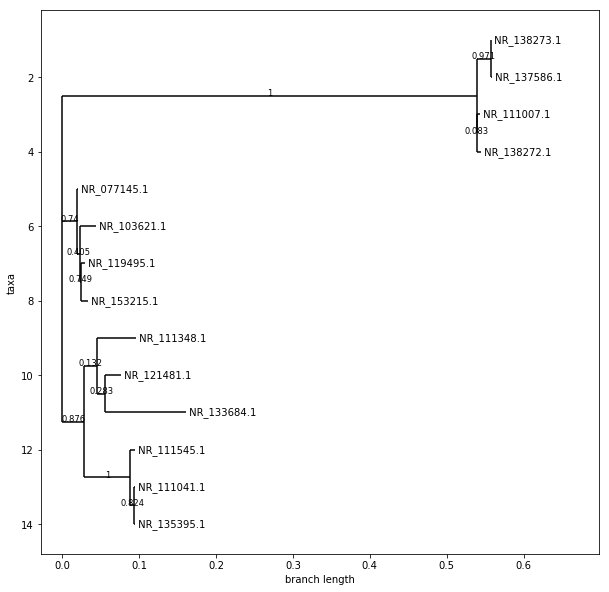

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
Phylo.draw(tree, axes=ax)

In [29]:
ids_to_names['NR_138273.1']

'Saccharomyces pastorianus'

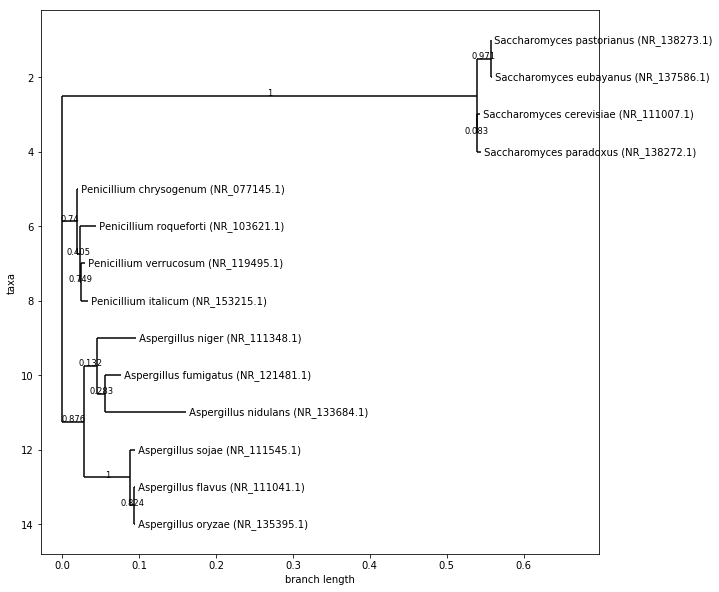

In [30]:
def id_to_name(node):
    seq_id = node.name
    name = ids_to_names.get(seq_id)
    if name is None:
        return None
    return f"{name} ({seq_id})"

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
Phylo.draw(tree, axes=ax, label_func=id_to_name)


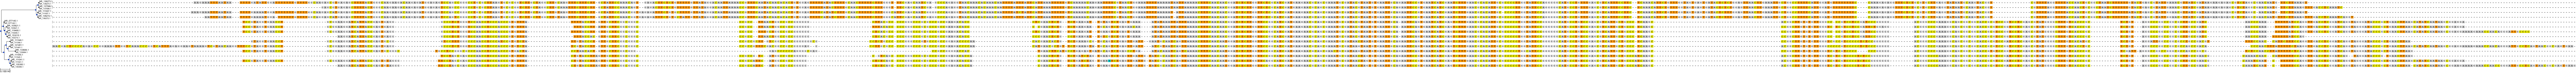

In [31]:
from ete3 import PhyloTree, TreeStyle

t = PhyloTree("selected.newick")
t.link_to_alignment("selected_aligned.fasta")
t.render("%%inline", tree_style=TreeStyle())


Getting quantitative information about a multiple alignment
---

In [32]:
from skbio import TabularMSA, DNA

msa = TabularMSA.read('selected_aligned.fasta', constructor=DNA, lowercase=True)
msa.reassign_index(minter='id')

In [33]:
positional_conservation = msa.conservation(
    metric='inverse_shannon_uncertainty', degenerate_mode='nan', gap_mode='include'
)

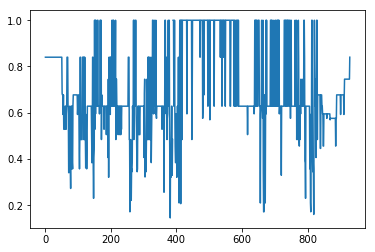

In [34]:
plt.plot(positional_conservation)

In [35]:
from skbio import DistanceMatrix
from skbio.sequence.distance import hamming

dm = DistanceMatrix.from_iterable(msa, metric=hamming, keys=msa.index)
print(dm)

14x14 distance matrix
IDs:
'NR_121481.1', 'NR_119495.1', 'NR_111545.1', 'NR_111041.1', 'NR_111007.1', ...
Data:
[[ 0.          0.15483871  0.26774194  0.20860215  0.65268817  0.18924731
   0.17741935  0.26236559  0.19892473  0.2688172   0.65053763  0.63763441
   0.63978495  0.18817204]
 [ 0.15483871  0.          0.17096774  0.10967742  0.58817204  0.04408602
   0.03225806  0.18064516  0.12795699  0.12043011  0.58494624  0.56451613
   0.5483871   0.12473118]
 [ 0.26774194  0.17096774  0.          0.0827957   0.56666667  0.14516129
   0.14408602  0.1827957   0.11935484  0.14408602  0.56344086  0.54516129
   0.50430108  0.10537634]
 [ 0.20860215  0.10967742  0.0827957   0.          0.56989247  0.08494624
   0.08387097  0.16344086  0.10752688  0.17311828  0.56666667  0.54731183
   0.53010753  0.0688172 ]
 [ 0.65268817  0.58817204  0.56666667  0.56989247  0.          0.56129032
   0.56021505  0.56129032  0.54946237  0.51182796  0.02688172  0.03548387
   0.08709677  0.62258065]
 [ 0.18924731

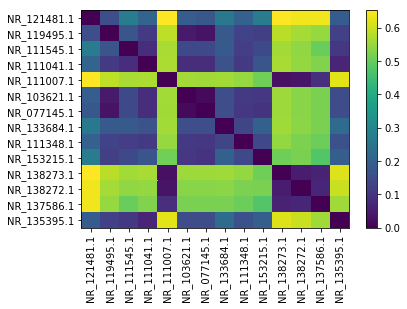

In [36]:
dm

Principal coordinate analysis
---

In [37]:
import skbio
pc = skbio.stats.ordination.pcoa(dm)

/Users/jvankerschaver/.edm/envs/bio-tutorial/lib/python3.6/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:111: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.013392498244451649 and the largest is 0.8751770649151318.
  RuntimeWarning


In [38]:
pc.samples

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
NR_121481.1,-0.234574,0.149827,0.040142,-0.020997,0.036721,0.006446,-0.003396,-0.000052,-0.000165,0.0,0.0,0.0,0.0,0.0
NR_119495.1,-0.175797,0.034108,0.005451,0.035615,-0.038952,-0.000667,-0.025524,-0.001356,0.000245,0.0,0.0,0.0,0.0,0.0
NR_111545.1,-0.140247,-0.104580,0.026118,-0.018435,0.025287,-0.009209,0.014781,-0.002422,-0.001091,0.0,0.0,0.0,0.0,0.0
NR_111041.1,-0.156886,-0.027789,0.024431,-0.039044,-0.020691,0.014551,0.043735,0.002580,0.000098,0.0,0.0,0.0,0.0,0.0
NR_111007.1,0.408360,0.032830,-0.003609,0.017411,0.019298,0.012904,0.016429,-0.014011,0.001219,0.0,0.0,0.0,0.0,0.0
NR_103621.1,-0.148841,0.012088,-0.018895,0.026260,-0.041034,-0.008742,0.010527,0.001811,0.007002,0.0,0.0,0.0,0.0,0.0
NR_077145.1,-0.148718,0.018427,-0.015914,0.028136,-0.031117,-0.009100,0.006587,-0.001021,-0.008078,0.0,0.0,0.0,0.0,0.0
NR_133684.1,-0.131744,-0.021575,-0.125639,-0.056387,0.008560,0.032285,-0.015538,-0.000056,-0.000070,0.0,0.0,0.0,0.0,0.0
NR_111348.1,-0.132679,-0.004864,-0.029901,-0.029533,0.036608,-0.053009,-0.005003,0.001147,0.001103,0.0,0.0,0.0,0.0,0.0
NR_153215.1,-0.098081,-0.034587,-0.021972,0.113362,0.024101,0.003316,0.001923,-0.000494,0.000197,0.0,0.0,0.0,0.0,0.0


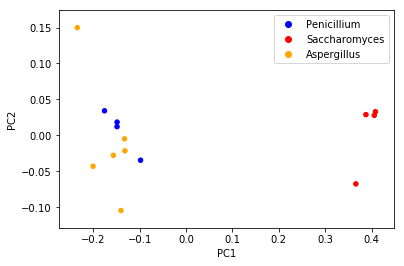

In [39]:
taxa_to_colors = {
    "Penicillium": "blue",
    "Saccharomyces": "red",
    "Aspergillus": "orange"
}
colors = [taxa_to_colors[ids_to_names[id_].split()[0]] for id_ in pc.samples.index]

pc.samples.plot.scatter(x='PC1', y='PC2', c=colors)

# Make empty plots to allow for a legend
for genus, color in taxa_to_colors.items():
    plt.plot([], [], 'o', c=color, label=genus)
plt.legend()

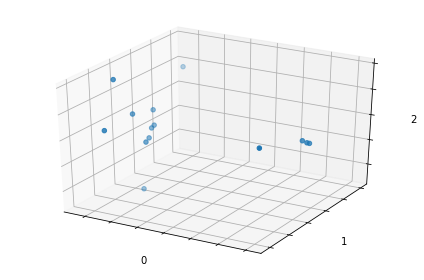

In [40]:
pc

In [41]:
from skbio.tree import nj

In [42]:
sk_tree = nj(dm)

In [43]:
print(sk_tree.ascii_art())

                    /-NR 121481.1
          /--------|
         |         |          /-NR 119495.1
         |          \--------|
         |                   |          /-NR 077145.1
         |                    \--------|
         |                              \-NR 103621.1
         |
         |                    /-NR 153215.1
         |          /--------|
         |         |         |          /-NR 137586.1
         |         |          \--------|
---------|         |                   |          /-NR 138272.1
         |         |                    \--------|
         |---------|                             |          /-NR 138273.1
         |         |                              \--------|
         |         |                                        \-NR 111007.1
         |         |
         |         |          /-NR 111348.1
         |          \--------|
         |                    \-NR 133684.1
         |
         |          /-NR 111545.1
          \--------|
          